<a href="https://colab.research.google.com/github/morprukop/RetailSalesAnalysis/blob/morgan/Graphs_MP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from sklearn.linear_model import LinearRegression
from sklearn import linear_model



drive.mount('/content/drive')
drive_dir = '/content/drive/My Drive/Shareddrives/Project_1/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Project_1/Data/cleaned_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.head(2)

,Unnamed: 0,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,Dept,Weekly_Sales,Type,Size,Day,Month,Year,Week_day,Holiday,IsHoliday
0,0,1,2010-05-02,42.31,2.572,211.096358,8.106,1,24924.50,A,151315,2,5,2010,Sunday,None,False
1,1,1,2010-05-02,42.31,2.572,211.096358,8.106,2,50605.27,A,151315,2,5,2010,Sunday,None,False


# Size

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


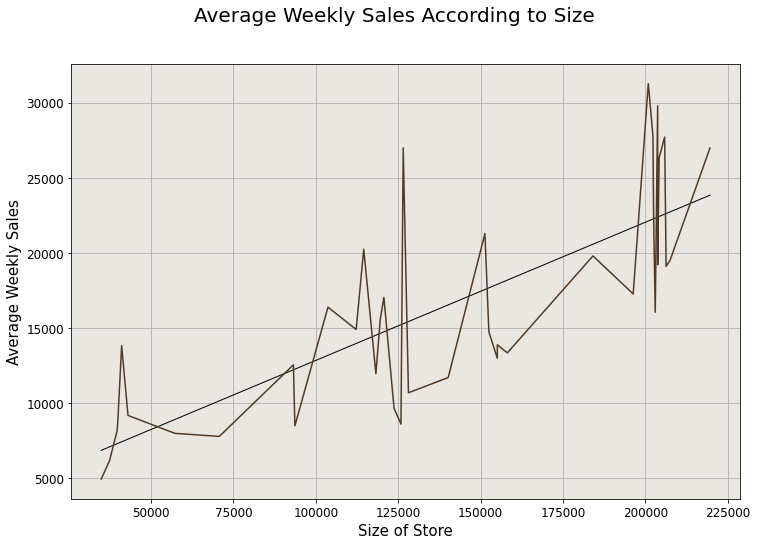

In [ ]:
#size of store x & avg weekly sales y
sizeMean = df.groupby('Size').mean()
sizeMean = sizeMean.reset_index()
sizeList = sizeMean['Size']

# LinearRegression will expect an array of shape (n, 1) 
# for the "Training data"
X = np.array(sizeList).reshape(-1,1)

# target data is array of shape (n,) 
y = sizeMean['Weekly_Sales']

plt.figure(figsize=(12,8))

plt.xlabel('Size of Store', fontsize=15)
plt.ylabel('Average Weekly Sales', fontsize=15)
plt.suptitle('Average Weekly Sales According to Size', fontsize=20)
plt.grid(True)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 

ax = plt.axes()
ax.set_facecolor("#eae6e1")

trend = linear_model.LinearRegression()
model = trend.fit(X, y)
scatter_y_pred = trend.predict(X)
plt.plot(X, scatter_y_pred, color='black', linewidth=1)
plt.plot(X,y, color = '#513a25')
plt.show()

# Holidays

(array([    0.,  5000., 10000., 15000., 20000., 25000.]),
 <a list of 6 Text major ticklabel objects>)

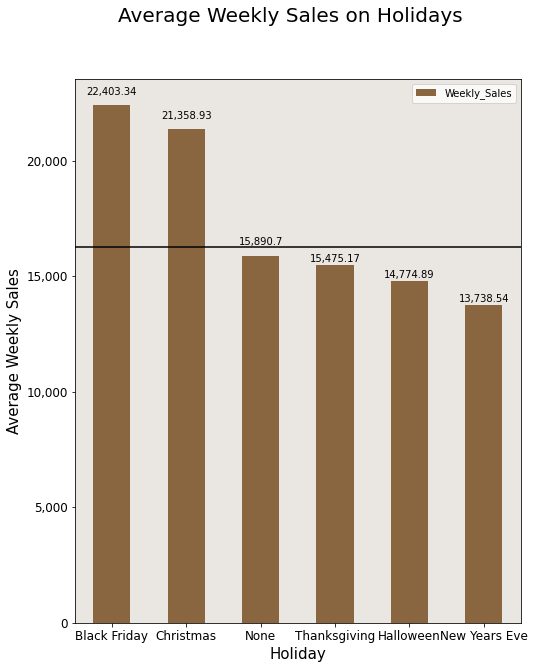

In [ ]:
holiMean = df.groupby('Holiday').mean()

fig = holiMean[['Weekly_Sales']].sort_values(by='Weekly_Sales',ascending=False).plot.bar(y='Weekly_Sales',color='#89663f', rot=0, figsize = [8,10])

mean = df['Weekly_Sales'].mean()
fig.axhline(mean,color = 'black')

labels = holiMean['Weekly_Sales'].tolist()

labels.sort(reverse=True)

#SORT THESE HOES, THE LABELS 
rects = fig.patches
for rect, label in zip(rects, labels):
  height = rect.get_height()
  if float(label) < 15500:
    fig.text(
        rect.get_x() + rect.get_width() / 2, height+50, "{:,}".format(round(label,2)), ha="center", va="bottom"
    )
  else:
    fig.text(
        rect.get_x() + rect.get_width() / 2, height+350, "{:,}".format(round(label,2)), ha="center", va="bottom"
    )

fig.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
fig.set_facecolor('#eae6e1')

plt.figsize=(12,8)
plt.xlabel('Holiday', fontsize=15)
plt.ylabel('Average Weekly Sales', fontsize=15)
plt.suptitle('Average Weekly Sales on Holidays', fontsize=20)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 

# Temperature

(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000.]), <a list of 9 Text major ticklabel objects>)

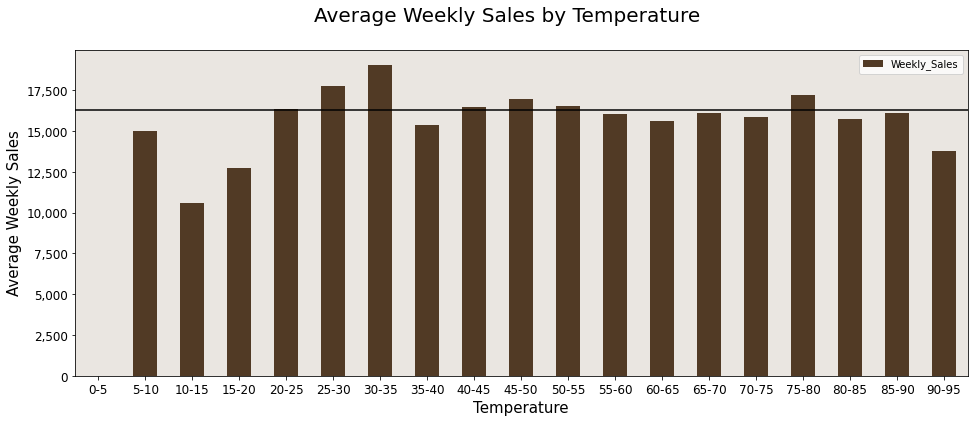

In [ ]:
# temperature binned by 5 & Average Weekly Sales

df['bin'] = pd.cut(df['Temperature'], bins=range(0,100,5), labels=[f'{l}-{l+5}' for l in range(0,91,5)])

mean_temp = df.groupby('bin').mean()

fig = mean_temp.plot(kind='bar',y='Weekly_Sales',figsize=(16,6), color='#513a25')
mean = df['Weekly_Sales'].mean()
fig.axhline(mean,color = 'black')

fig.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=360, ha="center")
fig.set_facecolor('#eae6e1')


plt.figsize=(12,8)
plt.xlabel('Temperature', fontsize=15)
plt.ylabel('Average Weekly Sales', fontsize=15)
plt.suptitle('Average Weekly Sales by Temperature', fontsize=20)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 


#Deparment


(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000.]), <a list of 9 Text major ticklabel objects>)

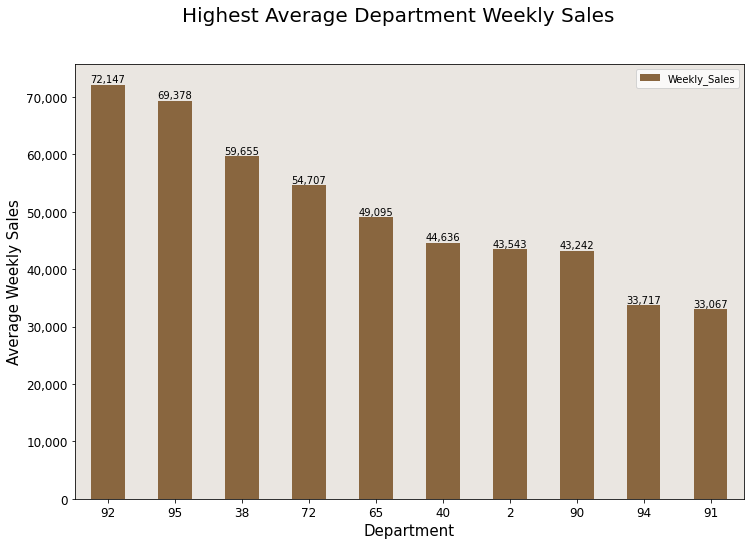

In [ ]:
dep_df = df.groupby('Dept').mean()
dep_l_df = dep_df.nlargest(10, 'Weekly_Sales')

fig = dep_l_df[['Weekly_Sales']].sort_values(by='Weekly_Sales',ascending=False).plot(kind="bar", figsize=(12,8), color='#89663f')

labels = dep_l_df['Weekly_Sales']

labels = labels.apply(lambda x: "{:,}".format(int(x)))
rects = fig.patches

for rect, label in zip(rects, labels):
    height = rect.get_height()
    fig.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )
fig.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=360, ha="center")
fig.set_facecolor('#eae6e1')
fig.set_ylabel('Average Weekly Sales')
fig.set_xlabel('Department')

plt.figsize=(12,8)
plt.xlabel('Department', fontsize=15)
plt.ylabel('Average Weekly Sales', fontsize=15)
plt.suptitle('Highest Average Department Weekly Sales', fontsize=20)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.]),
 <a list of 7 Text major ticklabel objects>)

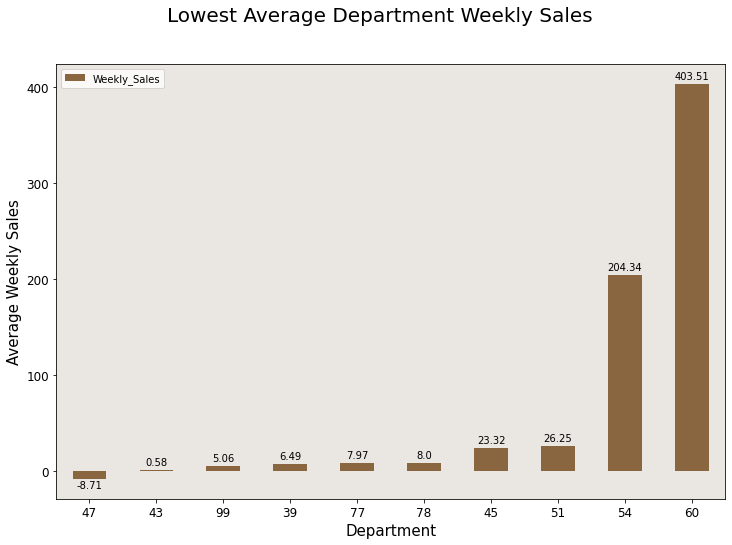

In [ ]:
sortdf = dep_df.sort_values(by='Weekly_Sales').head(10)
fig = sortdf[['Weekly_Sales']].sort_values(by='Weekly_Sales',ascending=True).plot(kind="bar",figsize=(12,8),color='#89663f')
labels = sortdf['Weekly_Sales']

labels = labels.apply(lambda x: "{:,}".format(round(x,2)))
rects = fig.patches

for rect, label in zip(rects, labels):
    height = rect.get_height()
    if float(label) < 0:
      fig.text(
          rect.get_x() + rect.get_width() / 2, height - 12, label, ha="center", va="bottom"
      )
    else:
      fig.text(
          rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom"
      )

plt.xticks(rotation=360, ha="center")
fig.set_facecolor('#eae6e1')

plt.xlabel('Department', fontsize=15)
plt.ylabel('Average Weekly Sales', fontsize=15)
plt.suptitle('Lowest Average Department Weekly Sales', fontsize=20)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 

##DF DROPPED NONE ROWS

In [ ]:
df.drop(df[df['Holiday'] == 'None'].index, inplace=True)

In [ ]:
holiSum = df.groupby('Holiday').sum()

Below Function: reformat_large_tick_values is from 
https://dfrieds.com/data-visualizations/how-format-large-tick-values.html

In [ ]:
def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_formatsns.set(font_scale=1.4)

def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

# Holidays with Dropped None

(array([0.00e+00, 2.50e+07, 5.00e+07, 7.50e+07, 1.00e+08, 1.25e+08,
        1.50e+08, 1.75e+08, 2.00e+08]),
 <a list of 9 Text major ticklabel objects>)

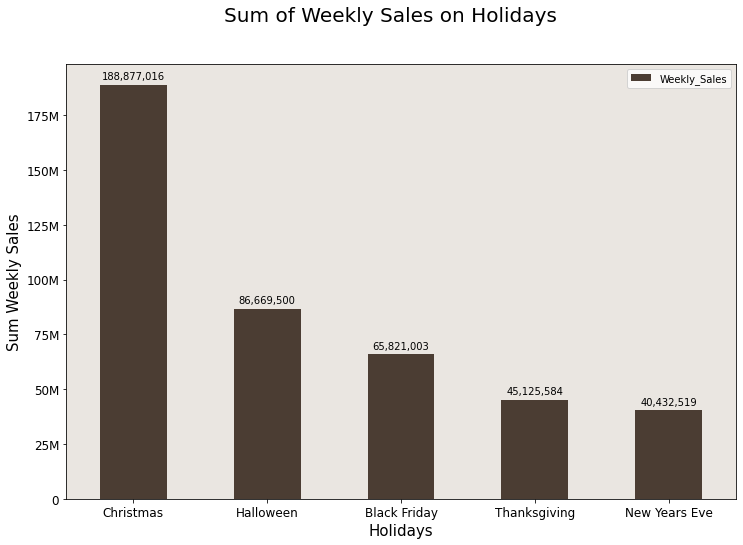

In [ ]:
fig = holiSum[['Weekly_Sales']].sort_values(by='Weekly_Sales',ascending=False).plot.bar(y='Weekly_Sales', rot=0, figsize = [12,8],color='#4b3d33')

labels = holiSum['Weekly_Sales'].tolist()

labels.sort(reverse=True)

labels = ["{:,}".format(int(x)) for x in labels]
rects = fig.patches

for rect, label in zip(rects, labels): 
    height = rect.get_height()
    fig.text(
        rect.get_x() + rect.get_width() / 2, height + 1500000, label, ha="center", va="bottom"
    )
import matplotlib.ticker as tick

fig.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

plt.xticks(rotation=360, ha="center")
fig.set_facecolor('#eae6e1')

plt.xlabel('Holidays', fontsize=15)
plt.ylabel('Sum Weekly Sales', fontsize=15)
plt.suptitle('Sum of Weekly Sales on Holidays', fontsize=20)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 

In [ ]:
#PIE CHART WE ARE NOT USING

# fig1, ax1 = plt.subplots()
# ax1.pie(holiSum['Weekly_Sales'], labels=df['Holiday'].unique(), autopct='%1.1f%%',
#         shadow=False, startangle=90, colors=['#e0ba84', '#bc9173', '#89663f', '#9d8165', '#8b5b2f'])
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
 

# plt.show()

# Correlation Map

In [ ]:
cor = df.corr().loc[['Size','Fuel_Price','Temperature','Unemployment','CPI'],['Weekly_Sales']]**2
cor

,Weekly_Sales
Size,0.052756
Fuel_Price,0.004274
Temperature,0.001972
Unemployment,0.000932
CPI,0.000577
